In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter

In [2]:
data = pd.read_csv("lung.csv")
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [3]:
data.loc[data["status"]==1,"status"] = 0
data.loc[data["status"]==2,"status"] = 1
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


# kaplan Meier Fitter : for predict the probability of the survival 

In [6]:
model = KaplanMeierFitter()
model.fit(durations=data.time , event_observed=data.status)

model.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [8]:
day_5 = model.event_table.iloc[1,:]

sur_5 = 1*(1- day_5.observed/day_5.at_risk)
print(sur_5)

day_11 = model.event_table.iloc[2,:]
sur_11 = sur_5*(1- day_11.observed/day_11.at_risk)
print(sur_11)

0.9956140350877193
0.9824561403508771


<Axes: xlabel='timeline'>

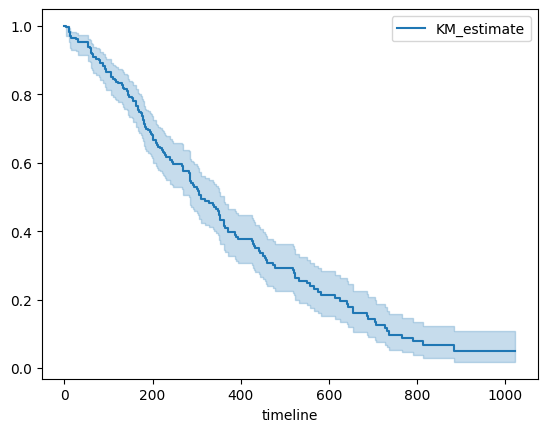

In [9]:
model.plot()

<Axes: xlabel='timeline'>

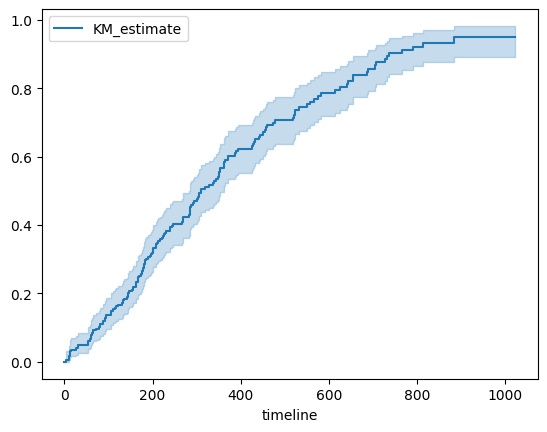

In [10]:
model.plot_cumulative_density()

# Log Rank test

- its a type of t test to check the differences in survival distribution of groups >=2 , 
- if p-value >0.05 : There is no difference in distribution 
- else: There is difference in the survival distribution of two groups 

## Male vs Female

In [11]:
df1 = data.query("sex==1")
df2 = data.query("sex==2")

m1 = KaplanMeierFitter()
m1.fit(durations=df1.time , event_observed=df1.status)

m2 = KaplanMeierFitter()
m2.fit(durations=df2.time , event_observed=df2.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 90 total observations, 37 right-censored observations>

<Axes: xlabel='timeline'>

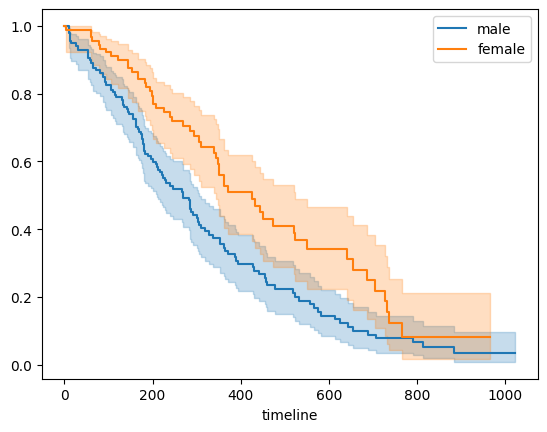

In [13]:
m1.plot(label = "male")
m2.plot(label = "female")

In [14]:
from lifelines.statistics import logrank_test

logrank_test(durations_A=df1.time , durations_B=df2.time ,
            event_observed_A=df1.status , event_observed_B=df2.status)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

 - As we can see p value is very low , there is some difference in the distributions of survival 